## Resource Model metrics and comparisons

Work with Arches-based resource models (RM)

Load GitHub repository and requirements

In [2]:
# Download and install latest version of Arches graph parser
!rm cultural-heritage -R
!git clone https://github.com/achp-project/cultural-heritage.git
!pip install -r cultural-heritage/graph-parser/requirements.txt

'rm' is not recognized as an internal or external command,
operable program or batch file.
Cloning into 'cultural-heritage'...


  Using cached https://files.pythonhosted.org/packages/10/ed/7e8b97591f6f456174139ec089c769f89a94a1a4025fe967691de971f314/bs4-0.0.1.tar.gz


  ERROR: Could not find a version that satisfies the requirement contourpy==1.0.7 (from -r cultural-heritage/graph-parser/requirements.txt (line 5)) (from versions: 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6)
ERROR: No matching distribution found for contourpy==1.0.7 (from -r cultural-heritage/graph-parser/requirements.txt (line 5))
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Load libraries

In [6]:
import os
import urllib.request
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from IPython.display import HTML
from pyvis import network as net
import folium
import json

ModuleNotFoundError: No module named 'folium'

Projects extents (map)

In [1]:
m = folium.Map(zoom_start=8)

projects_geojson = os.listdir('cultural-heritage/map-projects/prj-extent/')

for prj in projects_geojson:
  # geom = json.load(open('cultural-heritage/map-projects/prj-extent/' + prj))
  geojson_data = 'cultural-heritage/map-projects/prj-extent/' + prj
  geojson_layer = folium.GeoJson(
    geojson_data,
    name='GeoJSON',
    style_function=lambda feature: {
        'fillColor': 'green',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5
    },
    highlight_function=lambda x: {
        'fillOpacity':1
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['project'],
        aliases=['Project Name:'],
    ),
  )
  # geom = folium.GeoJson(geom)
  geojson_layer.add_to(m)
for feature in geojson_layer.data['features']:
    project = feature['properties']['project']
    description = feature['properties']['description']
    popup_content = f'<strong>Project:</strong> {description}'
    folium.Popup(popup_content).add_to(geojson_layer)
    
m

NameError: name 'folium' is not defined

List of available RMs

In [3]:
# Download uploaded cultural heritage partners graphs
# remote_source_files = {
#     "MAPSS": "https://raw.githubusercontent.com/achp-project/prj-mapss/main/pkg/graphs/Heritage%20Place%20(3).json",
#     "MAHS": "https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json",
#     "MAHSA": "https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json",
#     "MAEASAM": "https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json",
#     "EAMENA": "https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json",
# }

def rm_list():
	remote_source_files = {
		"MAPSS": "https://raw.githubusercontent.com/achp-project/prj-mapss/main/pkg/graphs/Heritage%20Place%20(3).json",
		"MAHS": "https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json",
		"MAHSA": "https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json",
		"MAEASAM": "https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json",
		"EAMENA": "https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json",
	}
	return(remote_source_files)
remote_source_files = rm_list()

Select two or more RMs to compare (checkoxes). Choose: MAHSA and EAMENA.

In [5]:
# def generate_checkboxes_from_dict(input_dict):
#     checkboxes = {key: widgets.Checkbox(description=key, value=False) for key in input_dict.keys()}
#     return checkboxes
# checkboxes_dict = generate_checkboxes_from_dict(remote_source_files)
# def get_and_print_checked_values(**kwargs):
#     checked_values = {key: value for key, value in kwargs.items() if isinstance(value, widgets.Checkbox) and value.value}
# interactive_widget = interactive(get_and_print_checked_values, **checkboxes_dict)
# display(interactive_widget)

def generate_checkboxes_from_dict(input_dict):
    checkboxes = {key: widgets.Checkbox(description=key, value=False) for key in input_dict.keys()}
    return checkboxes

def get_and_print_checked_values(**kwargs):
    checked_values = {key: value for key, value in kwargs.items() if isinstance(value, widgets.Checkbox) and value.value}

remote_source_files = rm_list()
checkboxes_dict = generate_checkboxes_from_dict(remote_source_files)
interactive_widget = interactive(get_and_print_checked_values, **checkboxes_dict)
display(interactive_widget)

NameError: name 'widgets' is not defined

Retrieve and show selected RM keys

In [ ]:
selected_keys = []
for key, checkbox in checkboxes_dict.items():
    if checkbox.value:
        selected_keys.append(key)
print("Selected projects:", selected_keys)
if len(selected_keys) < 2:
    print("Please select a minimum of two different JSON files")
else:
    subset_remote_source_files = {}
    # Iterate through the selected keys and add corresponding key-value pairs to the subset dictionary
    for key in selected_keys:
        if key in remote_source_files:
            subset_remote_source_files[key] = remote_source_files[key]
    print("Selected RMs:", subset_remote_source_files)

!rm inputResourceModels -R
!mkdir -p inputResourceModels

for (project_name, resource_model_url) in subset_remote_source_files.items():
  target_filename = f"{project_name}_{resource_model_url.split('/')[-1]}"
  # print(target_filename)
  urllib.request.urlretrieve(resource_model_url, filename=f"inputResourceModels/{target_filename}")

Create subgraph and comparison dataframe csv files by running [graph-parser.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_parser.py) and [graph-comparator.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_comparator.py)

In [ ]:
!python cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
!python cultural-heritage/graph-parser/graph_comparator.py -d -m compare -o comparisonMetrics.csv inputResourceModels/*.json
# Generate pandas Dataframes from csv
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
comparison_metrics = pd.read_csv('comparisonMetrics.csv')

Show subgraph metrics (see: [documentation](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/README.md#minimal_subgraph_data))

In [ ]:
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
col_order = ['G', 'source', 'target', 'property', 'source_id', 'target_id', 'source_name', 'target_name']
subgraph_metrics.rename(columns={'graph_name': 'G', 
								 'source_property': 'source', 
								 'target_property': 'target',
								 'relation_type': 'property'}, inplace=True)
subgraph_metrics['source_id'] = subgraph_metrics['source'] + '_' + subgraph_metrics['G']
subgraph_metrics['target_id'] = subgraph_metrics['target'] + '_' + subgraph_metrics['G']
subgraph_metrics = subgraph_metrics[col_order]
subgraph_metrics

Compararison metrics (see: [documentation](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/README.md#graph_comparison_data))

In [ ]:
comparison_metrics = pd.read_csv('comparisonMetrics.csv')
col_order = ['G', 'source', 'target', 'property', 'source_id', 'target_id'] # without source_name and target_name
comparison_metrics.rename(columns={'graph_name': 'G',
								   'source_property': 'source',
								   'target_property': 'target',
								   'relation_type': 'property'}, inplace=True)
comparison_metrics['G'] = 'both' # comparison_metrics['graph_name_1'] + "_x_" + comparison_metrics['graph_name_2']
comparison_metrics['source_id'] = comparison_metrics['source'] + '_' + comparison_metrics['G']
comparison_metrics['target_id'] = comparison_metrics['target'] + '_' + comparison_metrics['G']
comparison_metrics = comparison_metrics[col_order]
comparison_metrics

### Graphs



Graph graphical parameters, complete dataframe and functions

In [121]:
node_size = 200
font_size = 10
edge_width = .5
fig_dim = 10
node_color = "#add8e6" # lightblue

subgraph_metrics['weight'] = edge_width
comparison_metrics['weight'] = edge_width * 2

# Concatenation of subgraphs and comparison metrics and drops duplicates.Get subgraphs in both RM, and remove duplicated subgraphs
df_all_match = pd.concat([subgraph_metrics, comparison_metrics])
df_all_match = df_all_match.drop_duplicates()
df_all_match_copy = df_all_match.copy() # deep copy
df_all_match_copy['uniq'] = df_all_match_copy['source'] + "_" + df_all_match_copy['property'] + df_all_match_copy['target'] # field with unique id
# get 'both' rows in a separated df
df_both = df_all_match_copy.loc[df_all_match_copy['G'] == 'both'] # both dataframe
both_uniq = list(set(df_both['uniq'])) # get uniq ID in the 'both' dataframe
df_all_match_copy = df_all_match_copy[~df_all_match_copy['uniq'].isin(both_uniq)] # drop both from the main dataframe
df_all_complete = pd.concat([df_both, df_all_match_copy])

def create_graph(rm):
  # filter on graph label
  # condition = df_all_match['G'] == rm
  # condition = df_all_match['G'] in rm
  # df_G = df_all_match[condition]
  df_G = df_all_match[df_all_match.G.isin([rm])]
  G = nx.from_pandas_edgelist(df_G, 'source_id', 'target_id', True, create_using=nx.DiGraph())
  G_attrs_nodes = {}
  # clean
  rm_ = '_' + rm
  for i, node in enumerate(G.nodes()):
    a = re.sub(rm_, '', node)
    G_attrs_nodes[node] = {'entity': a, 'G': rm}
  nx.set_node_attributes(G, G_attrs_nodes)
  return(G)

def edges_labels(dict):
    newdict = {}
    for ed, value in dict.items():
      # short the name
      val = re.sub(r'_.*', '',  value)
      newdict[ed] = val
    return(newdict)

def nodes_labels(dict):
    newdict = {}
    for node, value in dict.items():
      # short the name
      val = re.sub(r'_.*', '',  value)
      newdict[node] = val
    return(newdict)

def plot_G(digraph):
  p = nx.circular_layout(digraph)
  labels_nodes = nx.get_node_attributes(digraph, 'entity')
  labels_nodes = nodes_labels(labels_nodes)
  labels_edges = nx.get_edge_attributes(digraph, 'property')
  labels_edges = edges_labels(labels_edges)
  plt.figure(figsize = (fig_dim + 6, fig_dim - 1))
  nx.draw(digraph, pos = p, labels = labels_nodes, with_labels = True, node_size = node_size, node_color = node_color, font_size = font_size, width = edge_width)
  nx.draw_networkx_edge_labels(digraph, pos = p, edge_labels = labels_edges, font_size = font_size)
  plt.show()

Plot individual graphs

EAMENA_Heritage%20Place


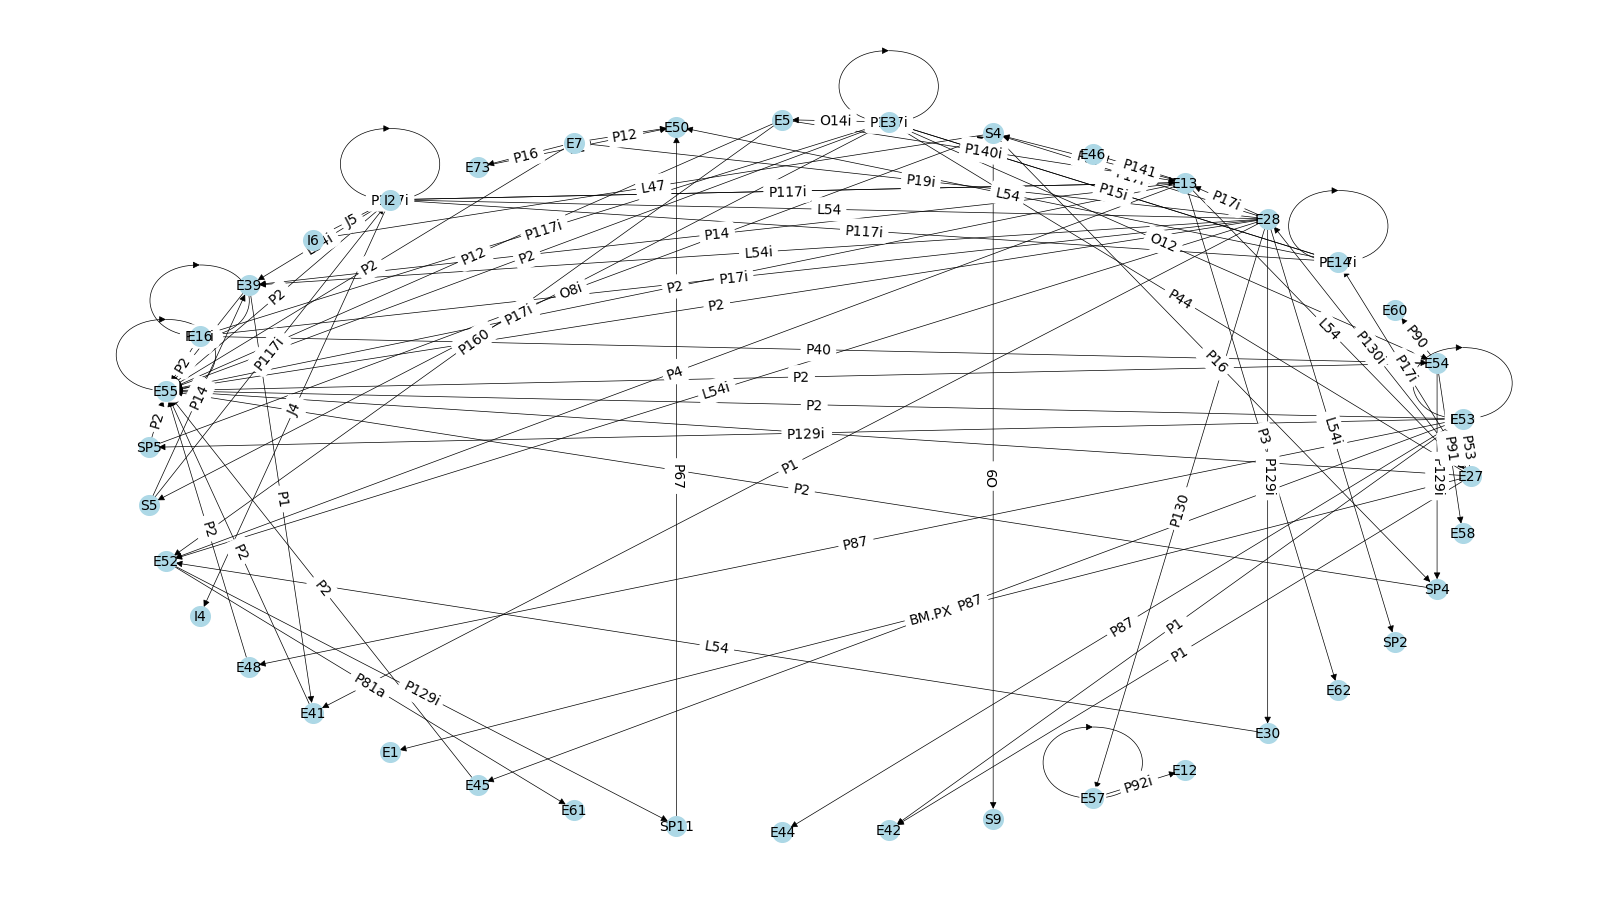

MAHSA_Heritage%20Location%20Resource%20Model


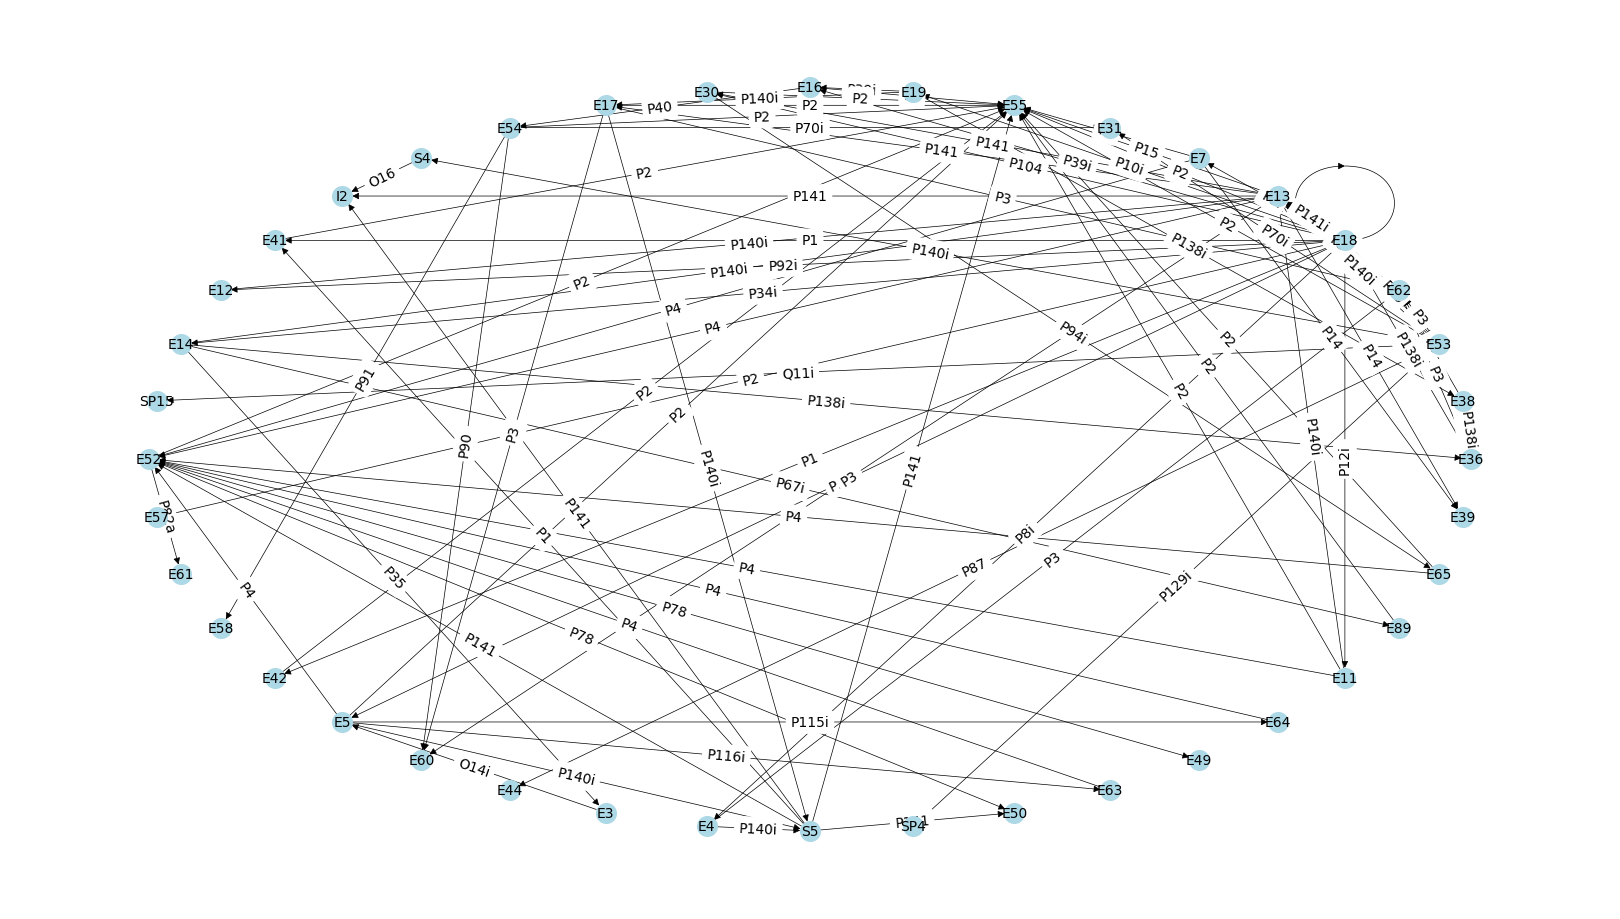

both


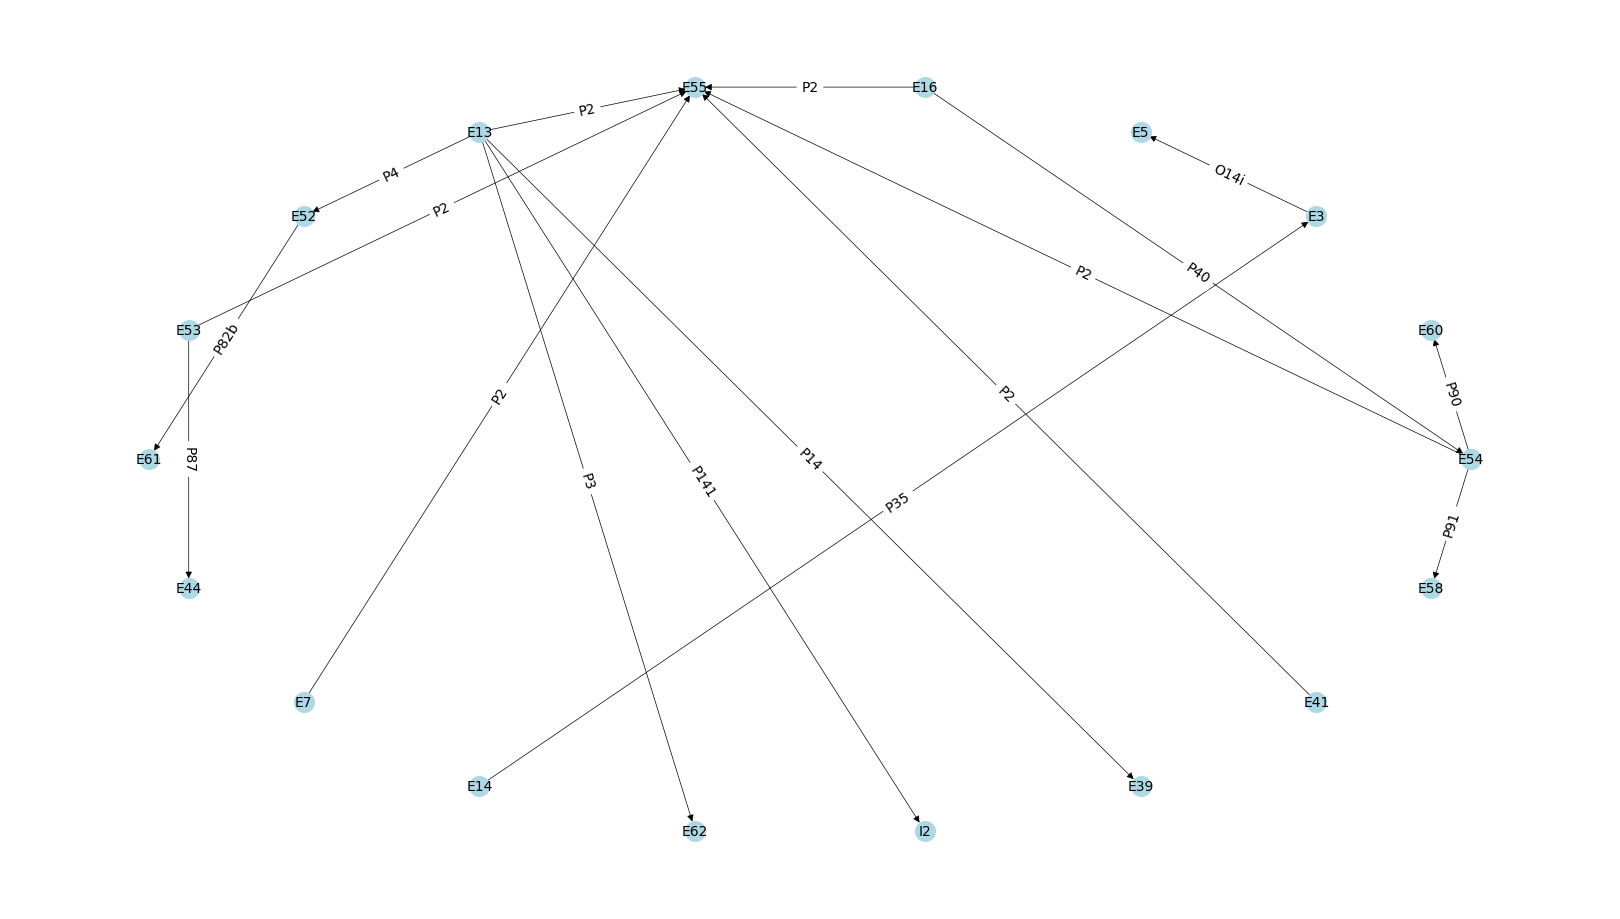

In [122]:
# graph_list = []
rms = df_all_match['G'].unique()
rms = rms.tolist()
for rm in rms:
  print(rm)
  G = create_graph(rm)
  # graph_list.append(G)
  plot_G(G)

Plot combined graphs

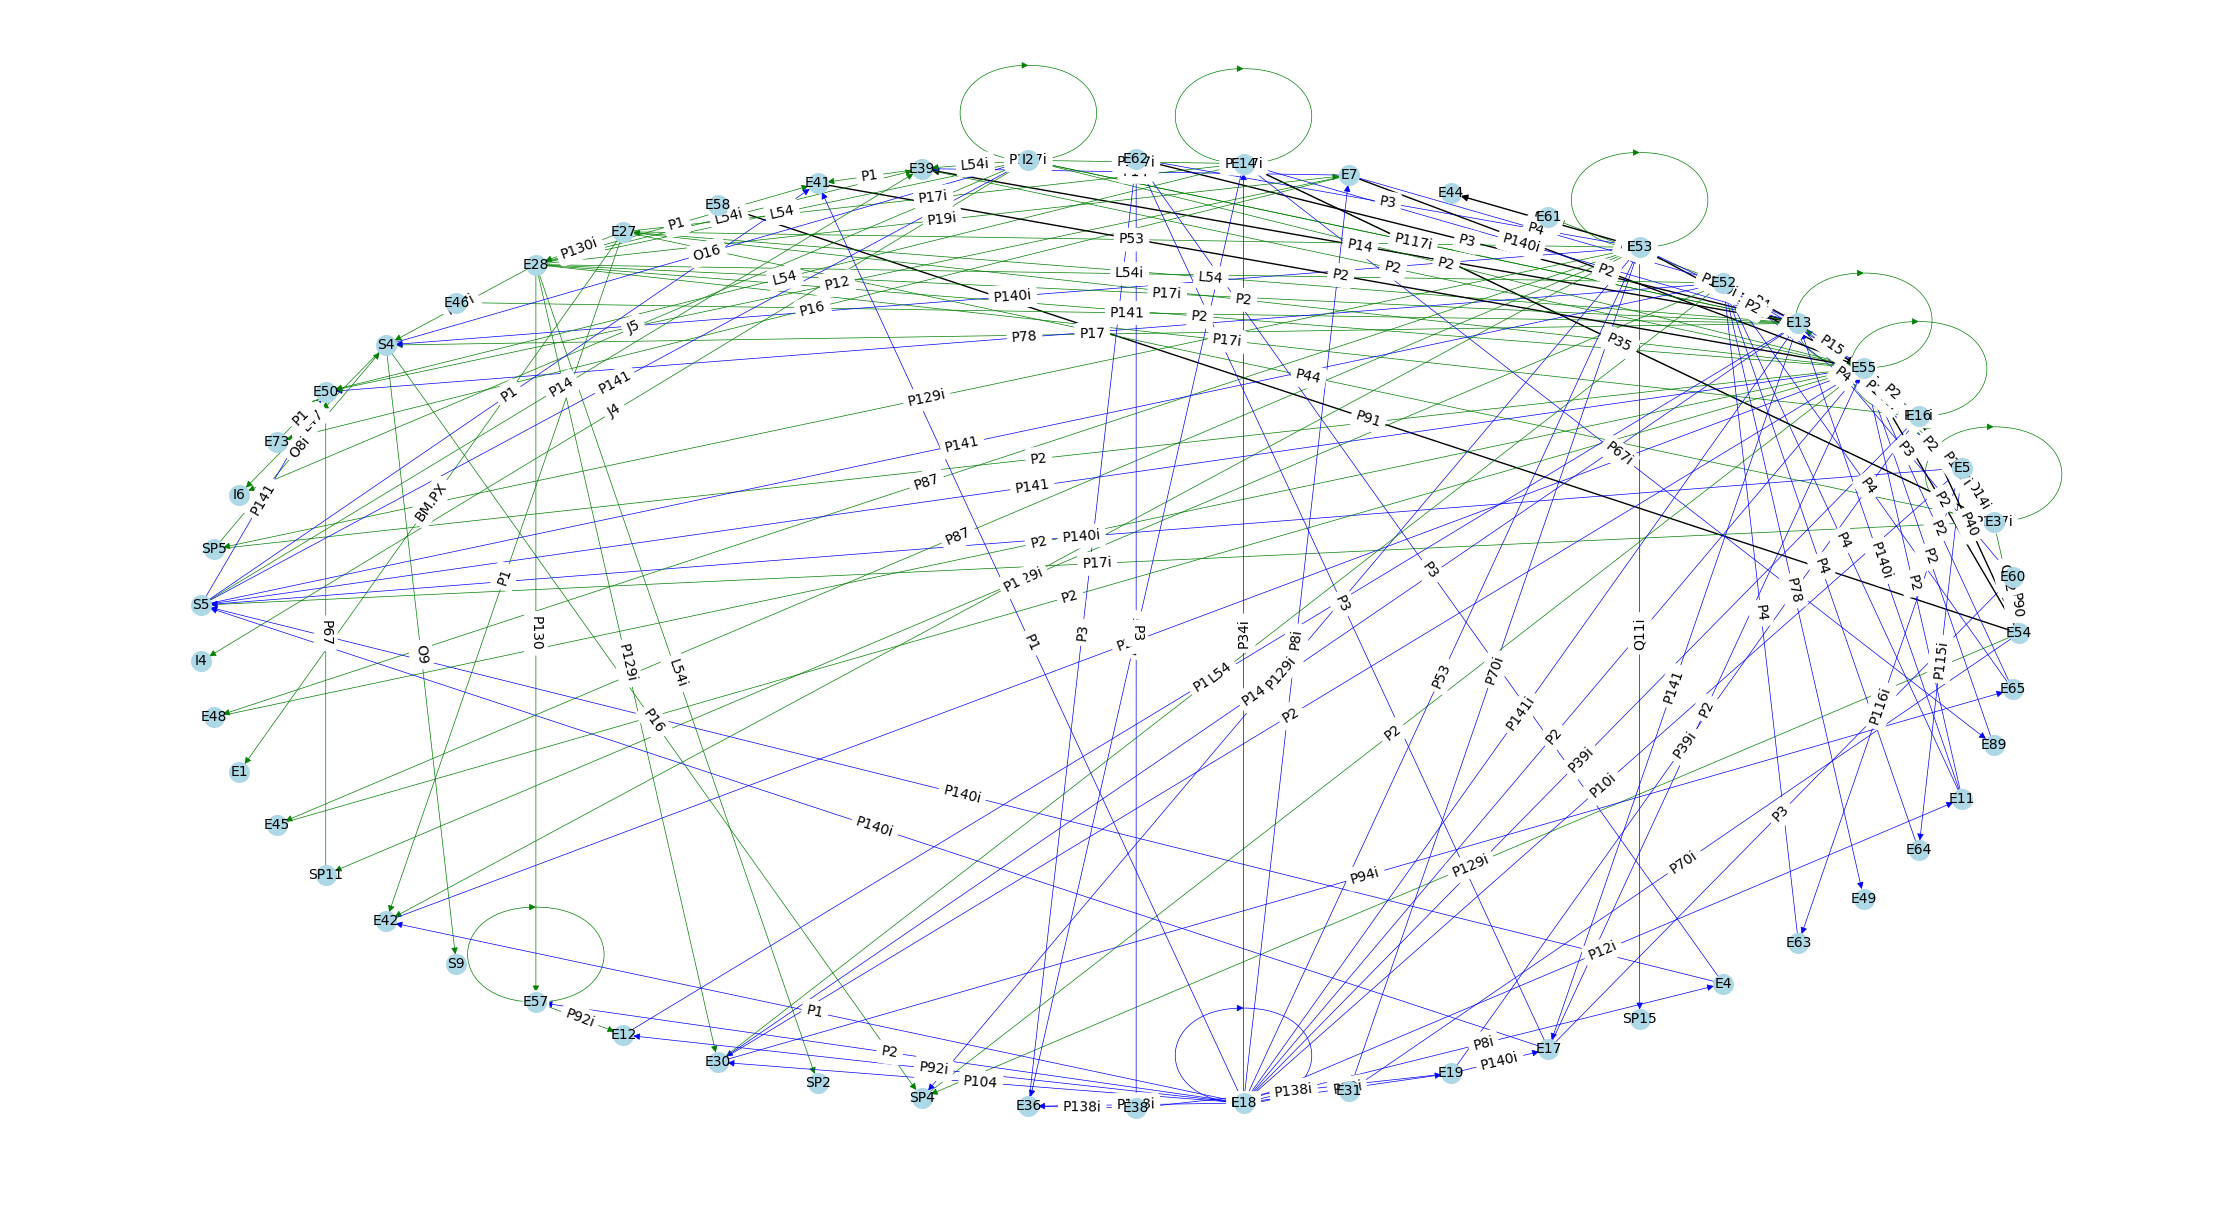

In [123]:
# assign colors
boths = df_all_complete['G'].unique().tolist()
boths.remove('both')
boths.append('both')
colors = ['green', 'blue', 'red', 'yellow', 'purple']
colors = colors[0:len(boths)-1]
colors.append('black')
df = pd.DataFrame(list(zip(boths, colors)),
               columns =['G', 'color'])
df_all_complete = df_all_complete.merge(df, left_on='G', right_on='G')

# load with attributes
G = nx.from_pandas_edgelist(df_all_complete, 'source', 'target', True, create_using=nx.DiGraph())
for i in G.nodes():
     G.nodes[i]['entity'] = re.sub(r'_.*', '',  i)

edges = G.edges()
colors = list(nx.get_edge_attributes(G,'color').values())
weights = list(nx.get_edge_attributes(G,'weight').values())

p = nx.circular_layout(G)
labels_nodes = nx.get_node_attributes(G, 'entity')
labels_nodes = nodes_labels(labels_nodes)
labels_edges = nx.get_edge_attributes(G, 'property')
labels_edges = edges_labels(labels_edges)
plt.figure(figsize = (fig_dim + 12, fig_dim + 2))
nx.draw(G, pos=p, labels = labels_nodes, with_labels = True, node_size = node_size, node_color = node_color, font_size = font_size, edge_color=colors, width=weights)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels = labels_edges)
plt.show()

In [9]:
# TODO: short node labels, node labels inside node shapes, label edges
def display_pyvis(pyvis_graph, name):
    filename = f"{name}.html"
    pyvis_graph.save_graph(filename)
    return HTML(filename=filename)   

g = net.Network(notebook = True, cdn_resources='remote', directed =True)
g.show_buttons(filter_=["physics"])
g.from_nx(G)
display_pyvis(g, "pyvis-example")


example1.html
